# Breast Cancer Prediction Using Machine-Learning Models

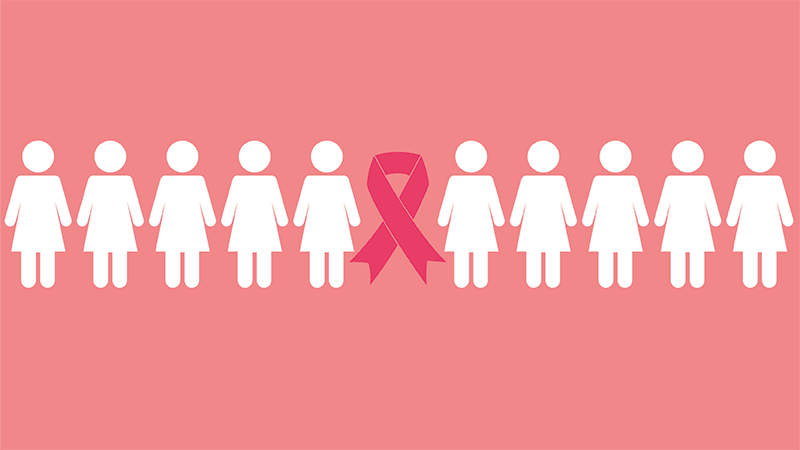

-  **Objective :** This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to **classify whether the breast cancer is benign or malignant**. To achieve this i have used **machine learning classification methods** to fit a function that can predict the discrete class of new input.

___
- **Structure of the Project :**
1. Importing Dependencies (library & packages)
2. Data Preparation --> (Load And Check Data)
3. Data Exploration & Analysis
4. Categorical data
5. Feature scaling
6. Model Selection
   - 6.1. Logistic Regression
   - 6.2. Decision Tree Classifier
   - 6.3. Random Forest Classifier
   - 6.4. Support Vector Machine (SVM) Classifier
   - 6.5. Gaussian Naive Bayes Algorithm Model
   - 6.6. Stochastic Gradient Descent Classifier
   - 6.7. Gradient Boosting Classifier\
 Perform Comparative Analysis of each & every 7-algorithms & then Conclude to the best-model.
___

## 1. Importing Dependencies 

- We will first go with importing the necessary libraries and import our dataset to jupyter notebook.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

___

## 2. Data preparation (Load & Check Data)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/AIML-B2/main/data.csv")

In [4]:
df.head()    # We can examine the data set using the pandas’ head() method.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

df.info()

- We can find any missing or null data points of the data set (if there is any) using the following pandas function.

In [6]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

- We can observe that the data set contain 569 rows and 32 columns.

In [7]:
df = df.drop("Unnamed: 32", axis=1)   # dropping the unwanted feature for prediction

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.drop('id', axis =1, inplace=True)   #dropping the unwanted feature for prediction

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
type(df.columns) 

pandas.core.indexes.base.Index

- ‘Diagnosis’ is the column which we are going to predict , which says if the cancer is M = malignant or B = benign.

In [13]:
df = df.rename(columns = {"diagnosis" : "target"})   # renaming the title of properties as per need of prediction

In [14]:
df.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
l= list(df.columns)
print(l)

['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


___
- **Variable/Attribute Description** \
Target--> **(M= malignant , B = Benign)**
___
- Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)
___
- The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [16]:
features_mean = l[1:11]

features_se = l[11:21]

features_worst =l[21:]

In [17]:
print(features_mean)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [18]:
print(features_se)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


In [19]:
print(features_worst)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [20]:
df.head(2)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [21]:
df['target'].unique() # M=Malignant, B=Benign

array(['M', 'B'], dtype=object)

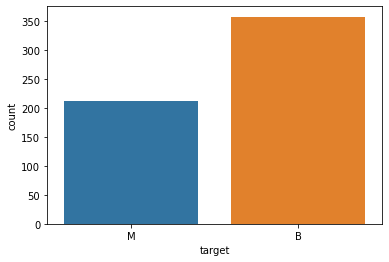

In [22]:
sns.countplot(df['target'],label="count");

In [23]:
df['target'].value_counts()

B    357
M    212
Name: target, dtype: int64

- 1 means the cancer is malignant and 0 means benign. We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant).

In [24]:
df.shape

(569, 31)

- We convert string expressions to int because it will be necessary when making trains. [Malignant = 1 ,Benign = 0]

In [25]:
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
df['target']=df['target'].map({'M':1, 'B':0})   

In [27]:
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df['target'].unique()

array([1, 0], dtype=int64)

- We look at the data need for standardization, if there are big differences between the data, standardization is required.

In [29]:
df.describe() # Summary of all the numeric columns

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
len(df.columns)

31

___

## 3. Data Exploration & Analysis

- Visualization of data is an imperative aspect to understand data and also to explain the data to another person. Python has several interesting visualization libraries such as Matplotlib, Seaborn etc.

In [31]:
corr = df.corr() #correlation plot
corr

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [32]:
corr.shape

(31, 31)

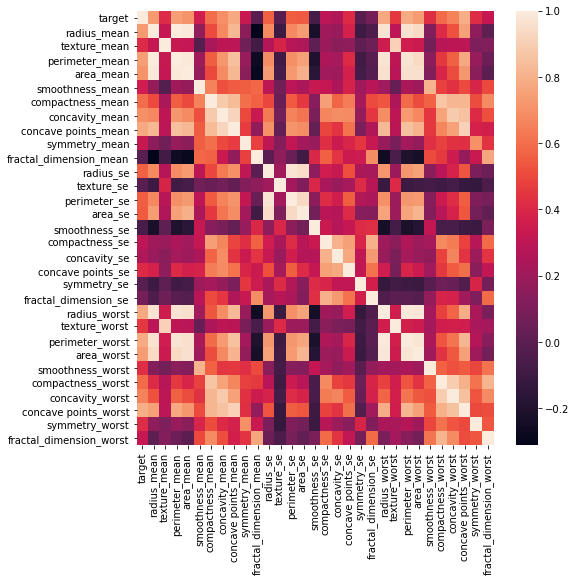

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(corr);

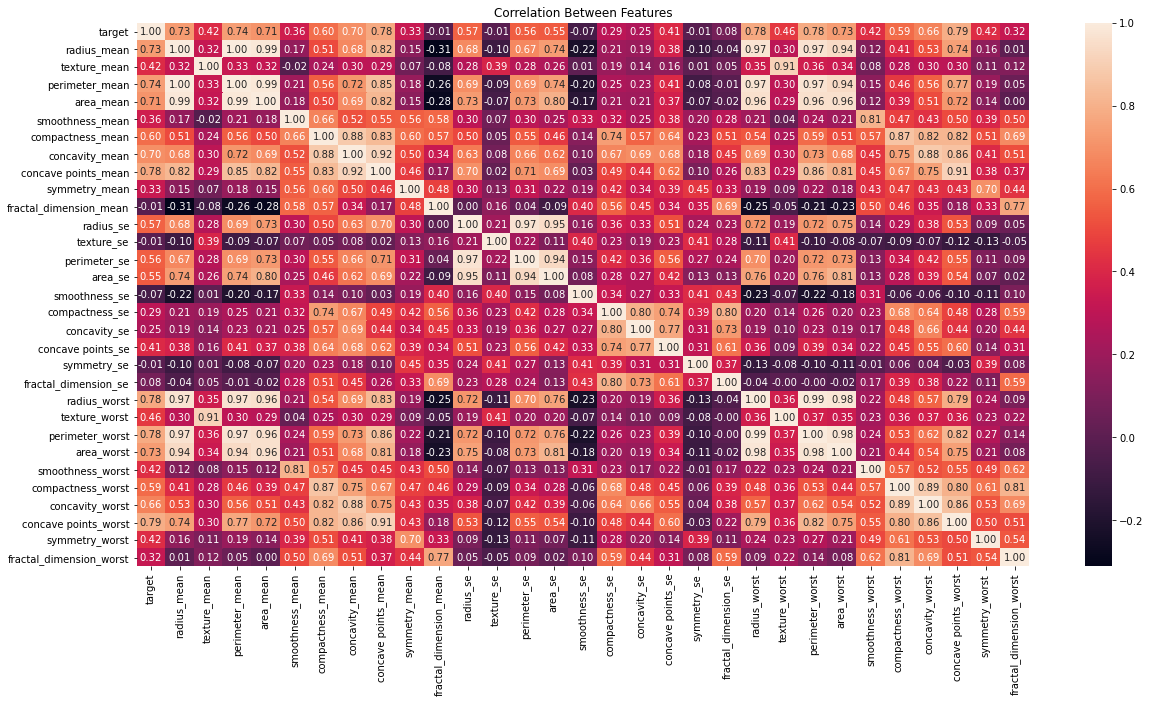

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, fmt =".2f")
plt.title("Correlation Between Features")
plt.show()

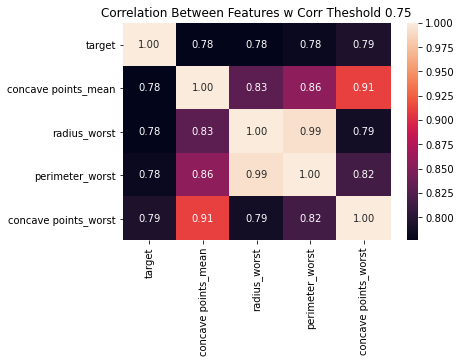

In [35]:
threshold = 0.75 
filtre = np.abs(corr["target"]) > threshold 
corr_features = corr.columns[filtre].tolist()
sns.heatmap(df[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

- First, we set a limit value. Here we set it to 0.75. We bring the ones whose relationship between properties is greater than 0.75.

In [36]:
df_melted = pd.melt(df , id_vars = "target",var_name = "features",value_name = "value")

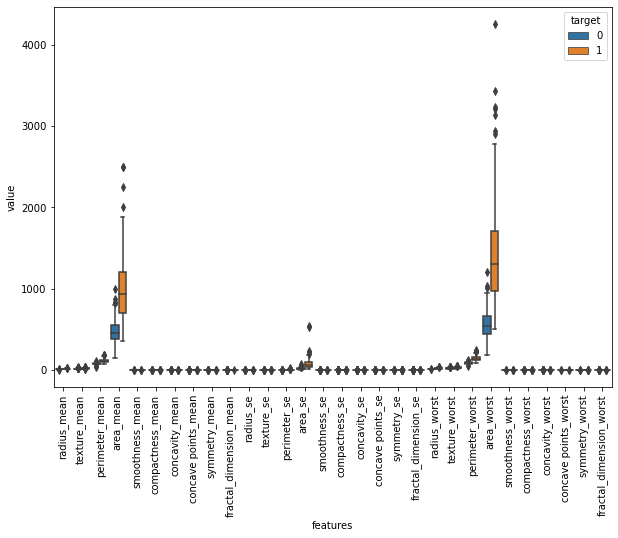

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = df_melted)
plt.xticks(rotation = 90) 
plt.show()

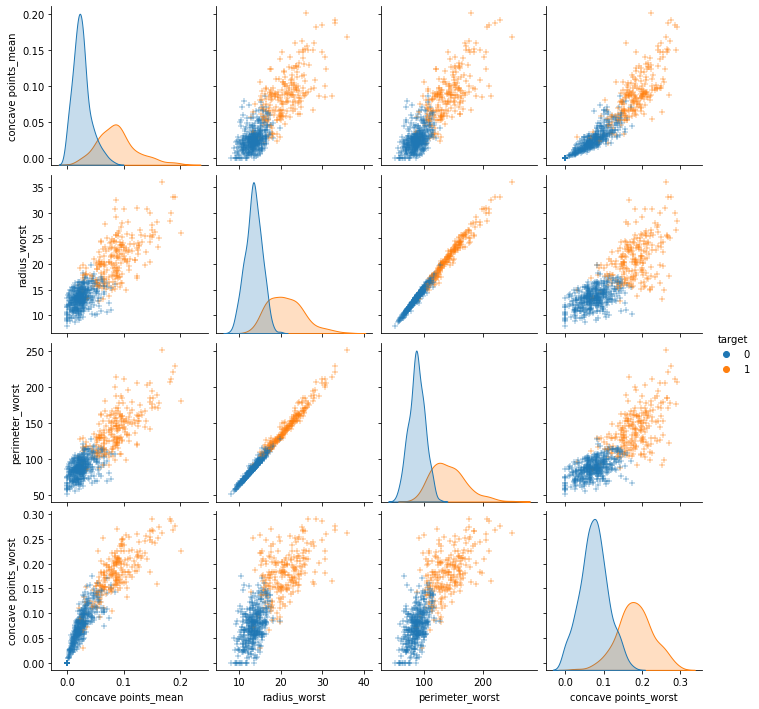

In [38]:
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "target")
plt.show()

In [39]:
X = df.drop('target',axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [41]:
columns = X.columns.tolist()

___

## 4. Categorical Data

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [43]:
df.shape

(569, 31)

- **Splitting the dataset :**
The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
We will do this using SciKit-Learn library in Python using the train_test_split method.

In [44]:
X_train.shape

(398, 30)

In [45]:
X_test.shape

(171, 30)

In [46]:
y_train.shape

(398,)

In [47]:
y_test.shape


(171,)

In [48]:
X_train.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
69,12.78,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.159,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.0641


___

## 5. Feature scaling

- Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like 0–100 or 0–1.
We will use StandardScaler method from SciKit-Learn library.

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [50]:
X_train

array([[-3.83014480e-01, -6.40379101e-01, -4.37663544e-01, ...,
        -8.68006528e-01, -8.18945366e-01, -1.11008720e+00],
       [-2.80435931e-01, -8.95159149e-01, -2.79486291e-01, ...,
        -2.86212957e-01,  1.43379338e+00,  7.52903961e-02],
       [-6.79660553e-01, -8.70788884e-01, -6.92192424e-01, ...,
        -5.67716201e-01, -2.31942501e-01, -3.65693530e-01],
       ...,
       [ 9.14465539e-01,  4.40869680e+00,  8.48229203e-01, ...,
         1.37098967e+00, -9.67167103e-02,  2.23743614e-03],
       [-7.10156878e-01, -2.26084589e-01, -7.38360912e-01, ...,
        -5.03476494e-01,  4.51869737e-01, -3.35299233e-01],
       [ 1.46339939e+00, -1.24172570e-01,  1.43838291e+00, ...,
         1.36189914e+00,  5.37922513e-01,  2.75786111e-01]])

In [51]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,3.414354e-16,-4.482037e-16,6.415862e-16,2.053076e-16,-5.143847e-16,-2.956875e-16,-2.103287e-16,-9.372737e-17,2.315812e-16,7.414505e-16,...,6.304281e-17,8.507991e-17,-3.280458e-16,-1.696019e-16,7.182976e-16,3.235826e-16,1.952654e-17,3.347406e-18,-8.954311e-17,-3.440855e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.793885e+00,-1.994037e+00,-1.780564e+00,-1.344009e+00,-3.138528e+00,-1.501149e+00,-1.105346e+00,-1.264751e+00,-2.614838e+00,-1.748717e+00,...,-1.541832e+00,-2.099089e+00,-1.541955e+00,-1.128142e+00,-2.807041e+00,-1.433300e+00,-1.297676e+00,-1.759181e+00,-2.075931e+00,-1.593197e+00
25%,-6.796606e-01,-7.112744e-01,-6.828584e-01,-6.573985e-01,-7.273386e-01,-7.751869e-01,-7.443952e-01,-7.419826e-01,-6.930515e-01,-7.195100e-01,...,-6.672673e-01,-7.665888e-01,-6.777116e-01,-6.342464e-01,-6.646698e-01,-6.759121e-01,-7.560073e-01,-7.675562e-01,-6.322416e-01,-6.680368e-01
50%,-2.443948e-01,-1.297113e-01,-2.485735e-01,-3.110712e-01,-3.711937e-02,-1.799899e-01,-3.382033e-01,-3.758428e-01,-6.808033e-02,-1.462893e-01,...,-2.734916e-01,-5.277774e-02,-2.895938e-01,-3.462358e-01,-1.139863e-02,-2.692310e-01,-2.261164e-01,-2.115191e-01,-1.374381e-01,-2.203875e-01
75%,5.055375e-01,5.498868e-01,5.421121e-01,3.502616e-01,6.414788e-01,4.429451e-01,4.442434e-01,6.009084e-01,5.343224e-01,4.538544e-01,...,5.246343e-01,6.893342e-01,5.511473e-01,3.436865e-01,6.183816e-01,5.410609e-01,5.098889e-01,7.062451e-01,4.303565e-01,3.850989e-01
max,3.867064e+00,4.408697e+00,3.863232e+00,5.059407e+00,4.663062e+00,4.297902e+00,4.099178e+00,3.814002e+00,4.259845e+00,4.684169e+00,...,3.969416e+00,3.726176e+00,4.148125e+00,5.693059e+00,3.395903e+00,4.896188e+00,4.600731e+00,2.649723e+00,5.719529e+00,6.536478e+00


In [52]:
X_train_df["target"] = y_train

In [53]:
df_melted = pd.melt(X_train_df, id_vars = "target",var_name = "features",value_name = "value")

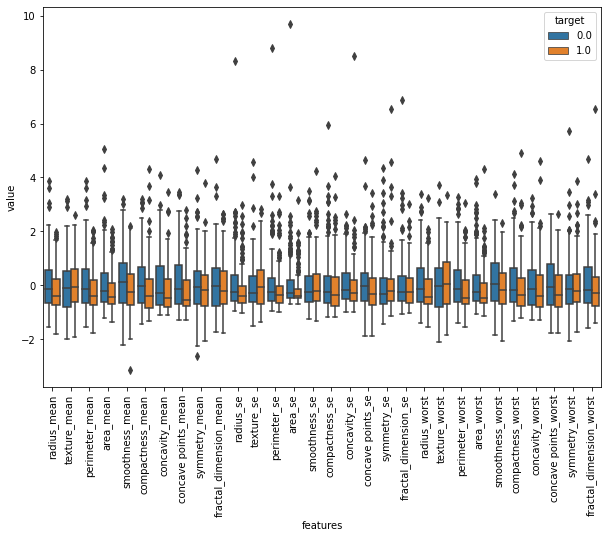

In [54]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = df_melted)
plt.xticks(rotation = 90)
plt.show()

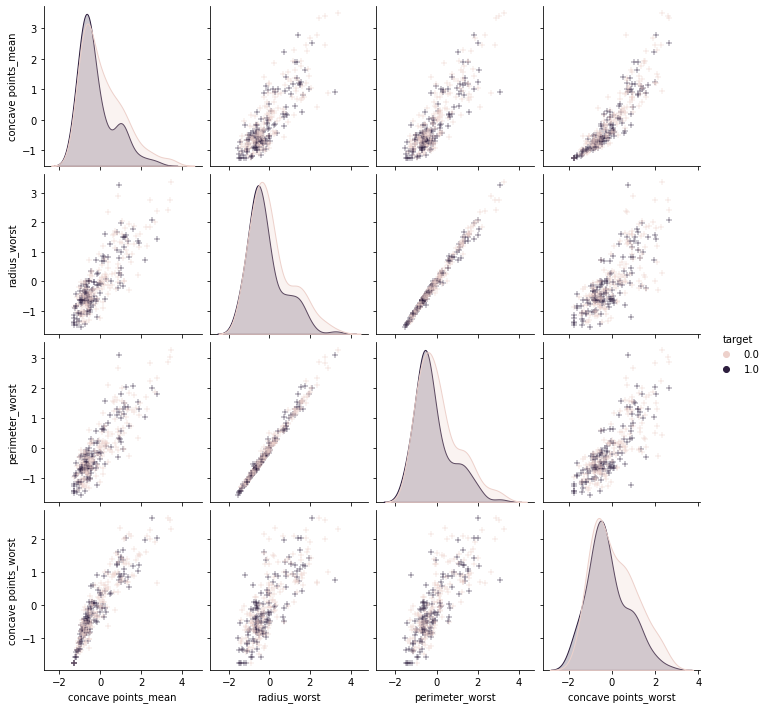

In [55]:
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

___

## 6. Machine Learning Models Selection

- This phase is known as Algorithm selection for Predicting the best results.

### 6.1. Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [57]:
y_pred = lr.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [59]:
y_test

538    0
331    0
471    0
335    1
346    0
      ..
386    0
424    0
94     1
396    0
327    0
Name: target, Length: 171, dtype: int64

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9883040935672515


In [61]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.9883040935672515


In [62]:
results = pd.DataFrame()
results

""


In [63]:
tempresults = pd.DataFrame({'Algorithm': ['logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.988304


### 6.2. Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9415204678362573


In [67]:
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.9415204678362573


In [68]:
tempresults = pd.DataFrame({'Algorithm': ['Decision Tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.988304
0,Decision Tree Classifier Method,0.941520


### 6.3. Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9649122807017544


In [72]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc)

0.9649122807017544


In [73]:
tempresults = pd.DataFrame({'Algorithm': ['Random forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.988304
0,Decision Tree Classifier Method,0.941520
0,Random forest Classifier Method,0.964912


### 6.4. Support Vector Machine Classifier

In [74]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [75]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9883040935672515


In [77]:
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.9883040935672515


In [78]:
tempresults = pd.DataFrame({'Algorithm': ['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.988304
0,Decision Tree Classifier Method,0.941520
0,Random forest Classifier Method,0.964912
0,Support Vector Classifier Method,0.988304


### 6.5. Gaussian Naive Bayes Algorithm Model

In [79]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [80]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9239766081871345


In [82]:
gnb_acc = accuracy_score(y_test, y_pred)
print(gnb_acc)

0.9239766081871345


In [83]:
tempresults = pd.DataFrame({'Algorithm': ['Gaussian Naive Bayes Method'], 'Accuracy':[gnb_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.988304
0,Decision Tree Classifier Method,0.941520
0,Random forest Classifier Method,0.964912
0,Support Vector Classifier Method,0.988304
0,Gaussian Naive Bayes Method,0.923977


### 6.6. Stochastic Gradient Descent Classifier

In [84]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)

SGDClassifier()

In [85]:
y_pred = sgdc.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9766081871345029


In [87]:
sgdc_acc = accuracy_score(y_test, y_pred)
print(sgdc_acc)

0.9766081871345029


In [88]:
tempresults = pd.DataFrame({'Algorithm': ['Stochastic gradient descent Classifier Method'], 'Accuracy':[sgdc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.988304
0,Decision Tree Classifier Method,0.941520
0,Random forest Classifier Method,0.964912
0,Support Vector Classifier Method,0.988304
0,Gaussian Naive Bayes Method,0.923977
0,Stochastic gradient descent Classifier Method,0.976608


### 6.7. Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [90]:
y_pred = gbc.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9590643274853801


In [92]:
gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9590643274853801


In [93]:
tempresults = pd.DataFrame({'Algorithm': ['Gradient Boosting Classifier Method'], 'Accuracy':[gbc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.988304
0,Decision Tree Classifier Method,0.941520
0,Random forest Classifier Method,0.964912
0,Support Vector Classifier Method,0.988304
0,Gaussian Naive Bayes Method,0.923977
0,Stochastic gradient descent Classifier Method,0.976608
0,Gradient Boosting Classifier Method,0.959064


- **Result :** Plotting the results of implemented algorithm models in bar graph comparision.

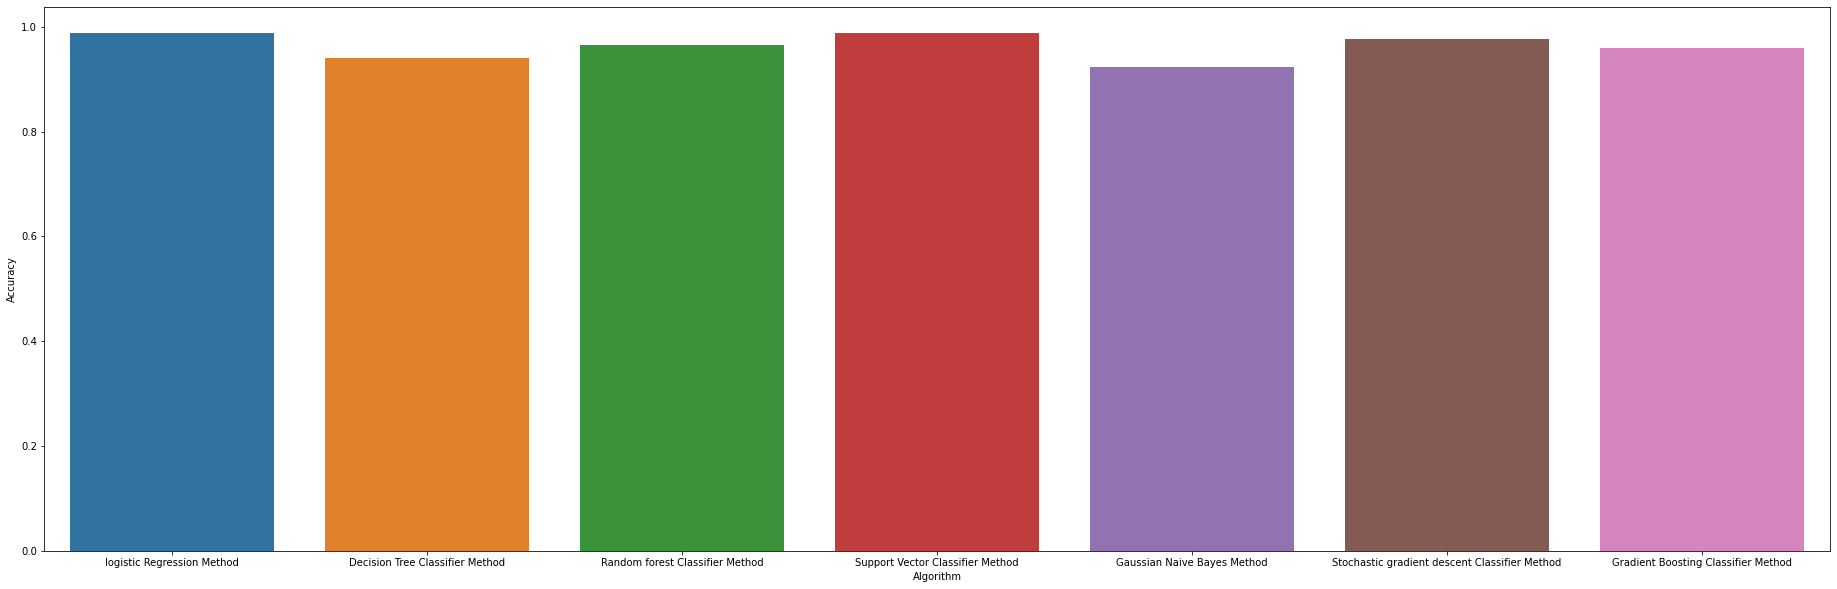

In [94]:
plt.figure(figsize=(32,10))
sns.barplot(x = "Algorithm", y = "Accuracy", data = results)
plt.show()

___

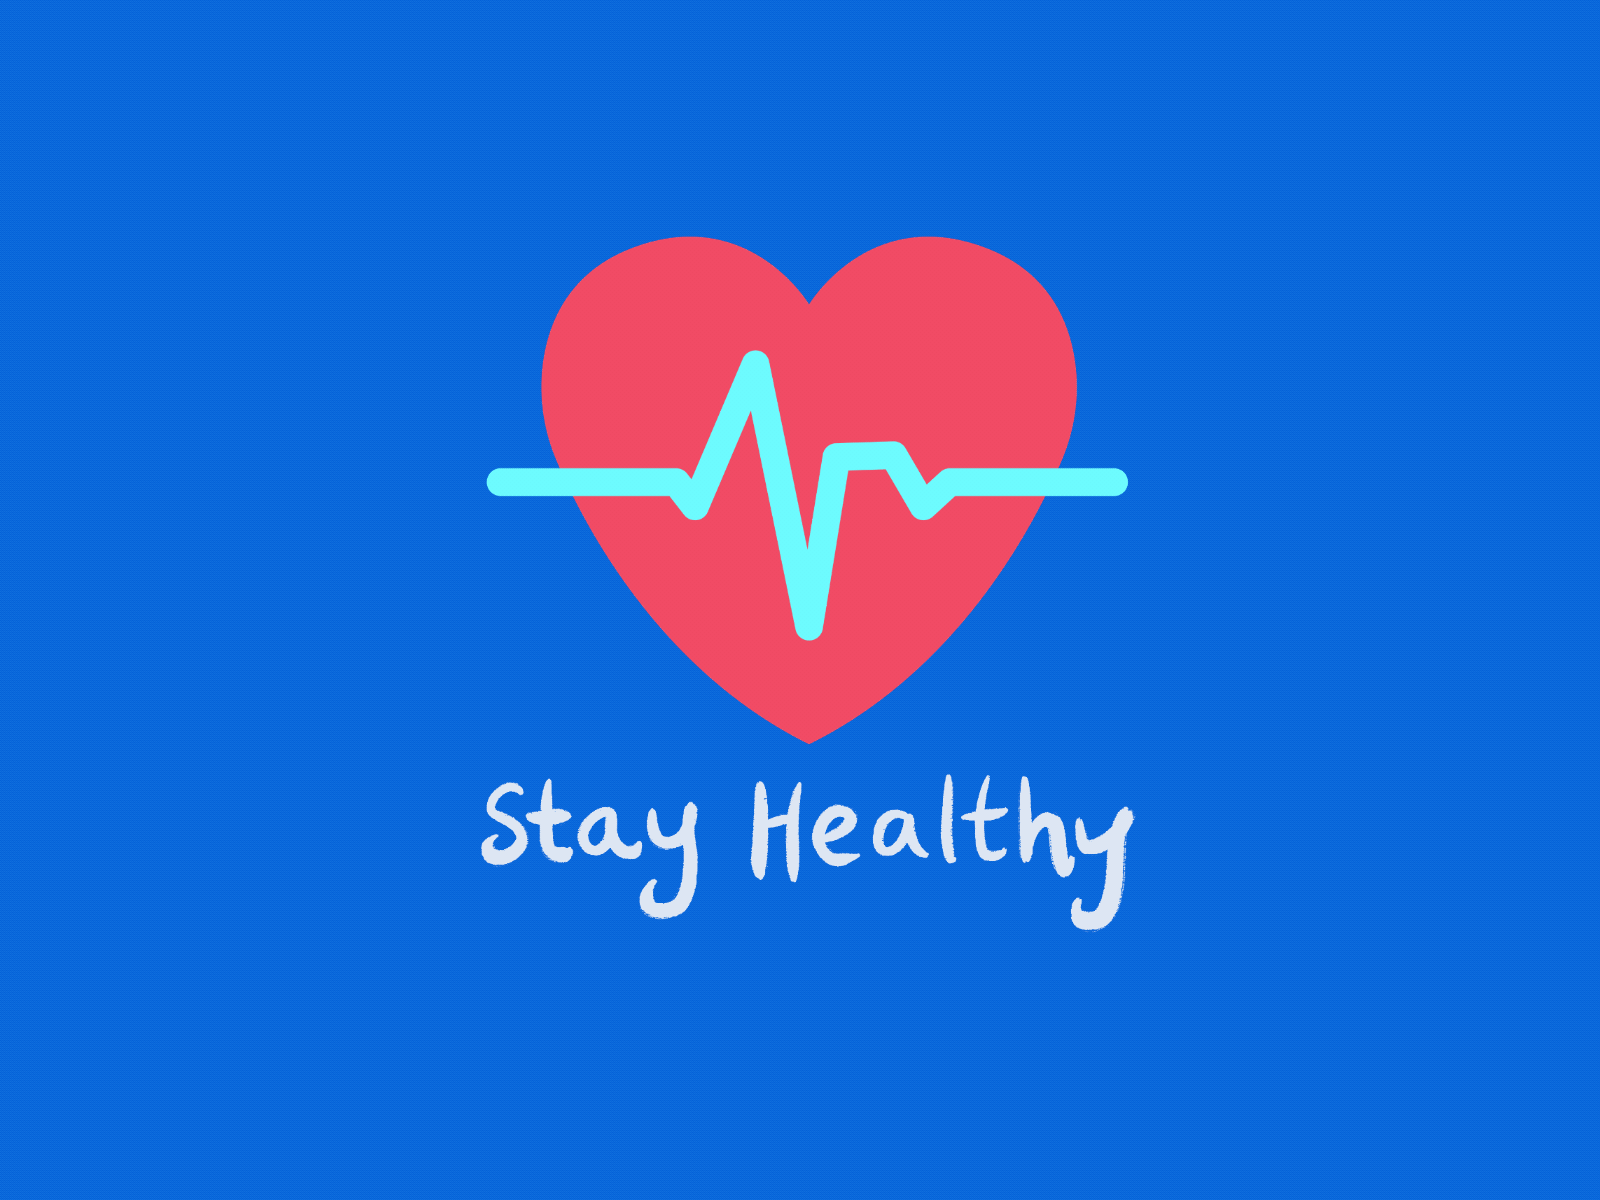